In [1]:
# This notebook is a file containing some plots and results could used for report
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing 

cwd = os.getcwd()
file = '/'.join(cwd.split('/')) + '/WA_Fn-UseC_-Sales-Win-Loss.csv'
data = pd.read_csv(file, index_col = 0)

In [2]:
# Data Preparition
data_clean = data.copy()
# Drop rows with opportunity amount 0
data_clean = data_clean.drop(data_clean[data_clean['Opportunity Amount USD'] == 0].index, axis = 0)
# Drop features that should not be used in training and prediction
data_clean = data_clean.drop(['Sales Stage Change Count', 'Elapsed Days In Sales Stage', 
                              'Ratio Days Identified To Total Days',
                              'Ratio Days Qualified To Total Days', 'Ratio Days Validated To Total Days', 
                              'Total Days Identified Through Closing', 'Total Days Identified Through Qualified',
                              'Deal Size Category'], 
                             axis = 1)
# Change opportunity result(our target variable) to numeric
minority = data_clean['Opportunity Result'].value_counts().idxmin()
result = np.array((data_clean['Opportunity Result'] == minority).astype(int))
data_clean = data_clean.drop(['Opportunity Result'], axis = 1)
# For each categorical variables in the dataset, try to assign an unique indicator variable 
#      for each different category
# (This may not be a good step because it adds too many columns, but we'll see)
for col in data_clean.columns:
    if is_string_dtype(data_clean[col]):
        name_set = set(data_clean[col])
        for name in name_set:
            data_clean[' '.join([col, name, 'indicator'])] = (data_clean[col] == name).astype(int)
        data_clean = data_clean.drop([col], axis = 1)
# Check if there is any null value in our dataset
if data_clean.isnull().any().any():
    print('NO!!!!!')
# Gladly, we don't have any

# Normalize our dataset
scale = preprocessing.StandardScaler()
data_clean = pd.DataFrame(scale.fit_transform(data_clean), columns = data_clean.columns)
data_clean['result'] = result

In [3]:
data_clean.describe()

,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Supplies Subgroup Shelters & RV indicator,Supplies Subgroup Towing & Hitches indicator,Supplies Subgroup Exterior Accessories indicator,Supplies Subgroup Performance Parts indicator,Supplies Subgroup Garage & Car Care indicator,Supplies Subgroup Replacement Parts indicator,...,Region Northeast indicator,Route To Market Reseller indicator,Route To Market Telecoverage indicator,Route To Market Telesales indicator,Route To Market Other indicator,Route To Market Fields Sales indicator,Competitor Type Known indicator,Competitor Type Unknown indicator,Competitor Type None indicator,result
count,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,...,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,7.594900e+04,75949.000000
mean,-1.218139e-15,1.388359e-14,8.169116e-14,3.129593e-15,-1.345197e-15,1.398922e-14,-1.264065e-14,-1.804786e-15,-2.869212e-15,8.351718e-15,...,-1.767704e-13,-3.925777e-15,-1.515373e-14,-2.018827e-14,4.302223e-14,-5.005615e-15,4.924558e-14,6.546414e-15,-8.742830e-15,0.227508
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.419226
min,-7.017705e-01,-5.009095e-01,-4.977452e-01,-3.263534e-01,-3.732947e-01,-2.278071e-01,-4.660783e-01,-1.839187e-01,-3.802446e-01,-3.315040e-01,...,-3.248582e-01,-9.092102e-01,-8.787612e-02,-1.734828e-01,-1.919173e-01,-9.512707e-01,-4.276846e-01,-1.632850e+00,-3.660006e-01,0.000000
25%,-5.749904e-01,-5.009095e-01,-4.977452e-01,-3.263534e-01,-3.732947e-01,-2.278071e-01,-4.660783e-01,-1.839187e-01,-3.802446e-01,-3.315040e-01,...,-3.248582e-01,-9.092102e-01,-8.787612e-02,-1.734828e-01,-1.919173e-01,-9.512707e-01,-4.276846e-01,-1.632850e+00,-3.660006e-01,0.000000
50%,-3.288734e-01,-5.009095e-01,-4.977452e-01,-3.263534e-01,-3.732947e-01,-2.278071e-01,-4.660783e-01,-1.839187e-01,-3.802446e-01,-3.315040e-01,...,-3.248582e-01,-9.092102e-01,-8.787612e-02,-1.734828e-01,-1.919173e-01,-9.512707e-01,-4.276846e-01,6.124260e-01,-3.660006e-01,0.000000
75%,1.186121e-01,-5.009095e-01,-4.977452e-01,-3.263534e-01,-3.732947e-01,-2.278071e-01,-4.660783e-01,-1.839187e-01,-3.802446e-01,-3.315040e-01,...,-3.248582e-01,1.099856e+00,-8.787612e-02,-1.734828e-01,-1.919173e-01,1.051225e+00,-4.276846e-01,6.124260e-01,-3.660006e-01,0.000000
max,6.756314e+00,2.745545e+00,2.815859e+00,3.983731e+00,2.678849e+00,4.389679e+00,2.145562e+00,5.437185e+00,2.629886e+00,3.016555e+00,...,3.078266e+00,1.099856e+00,1.137966e+01,5.764259e+00,5.210577e+00,1.051225e+00,2.338172e+00,6.124260e-01,2.732236e+00,1.000000


In [10]:
# Split data into training and test
length = len(data_clean['result'])
train_index = []
test_index = []
val_index = []
for i in range(length):
    rand = np.random.rand()
    if rand <= 0.8:
        train_index.append(i) 
    elif rand <= 0.9:
        val_index.append(i)
    else:
        test_index.append(i)
data_train = data_clean.iloc[train_index, :]
data_val = data_clean.iloc[val_index, :]
data_test = data_clean.iloc[test_index, :]

# Below is a started version where we didn't set any parameter for all classifiers

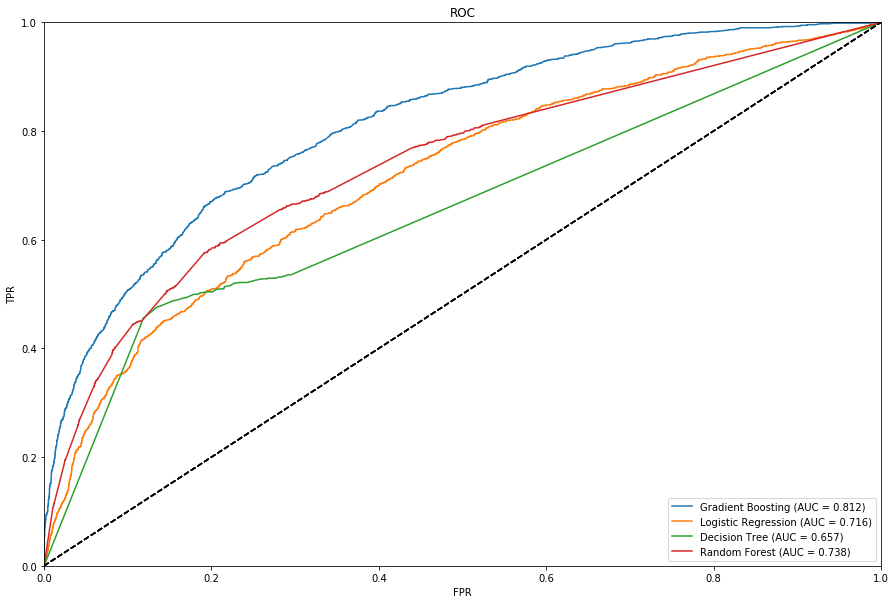

In [11]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
# Firstly, run a Logistic Regression
lg = linear_model.LogisticRegression()
lg.fit(data_train.drop(['result'], axis = 1), data_train['result'])
result_lg = lg.predict_proba(data_val.drop(['result'], axis = 1))[:, 1]
# And Decision Tree
DT = DecisionTreeClassifier()
DT.fit(data_train.drop(['result'], axis = 1), data_train['result'])
result_DT = DT.predict_proba(data_val.drop(['result'], axis = 1))[:, 1]
# And Gradient Boosting
gra_boost = GBC() 
gra_boost.fit(data_train.drop(['result'], axis = 1), data_train['result'])
result_gbc = gra_boost.predict_proba(data_val.drop(['result'], axis = 1))[:, 1]
# And Random Forest
RF = RandomForestClassifier()
# Train the model
RF.fit(data_train.drop("result", 1), data_train['result'])
# Make predictions
result_RF = RF.predict_proba(data_val.drop("result", 1))[:,1]
def plotROC(preds, truth, name):
    fpr, tpr, thresholds = roc_curve(truth, preds)
    roc_auc = auc(fpr, tpr)
    # chooses a random color for plotting
    #c = (np.random.rand(), np.random.rand(), np.random.rand())
    #create the plot
    plt.plot(fpr, tpr, label = name + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

# Plot ROC for all models
fig = plt.figure(figsize = (15, 10))
plotROC(result_gbc, data_val['result'], 'Gradient Boosting')
plotROC(result_lg, data_val['result'], 'Logistic Regression')
plotROC(result_DT, data_val['result'], 'Decision Tree')
plotROC(result_RF, data_val['result'], 'Random Forest')
plt.show()

# If we use the parameter we found by grid search, the result is as follows

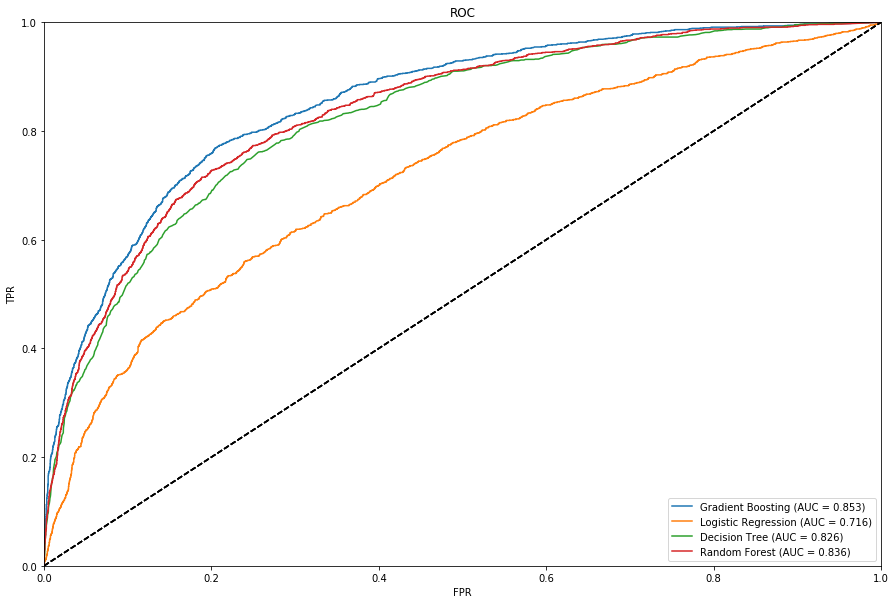

In [12]:
%matplotlib inline
# Firstly, run a Logistic Regression
best_lg = linear_model.LogisticRegression(C = 10, solver = 'newton-cg')
best_lg.fit(data_train.drop(['result'], axis = 1), data_train['result'])
Result_lg = best_lg.predict_proba(data_val.drop(['result'], axis = 1))[:, 1]
# And Decision Tree
best_DT = DecisionTreeClassifier(criterion = 'gini', max_features = None, min_samples_leaf = 60,
                                 min_samples_split = 100)
best_DT.fit(data_train.drop(['result'], axis = 1), data_train['result'])
Result_DT = best_DT.predict_proba(data_val.drop(['result'], axis = 1))[:, 1]
# And Gradient Boosting
best_gbc = GBC(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) 
best_gbc.fit(data_train.drop(['result'], axis = 1), data_train['result'])
Result_gbc = best_gbc.predict_proba(data_val.drop(['result'], axis = 1))[:, 1]
# And Random Forest
best_RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                 max_depth=30, max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=5, min_samples_split=12,
                                 min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
                                 oob_score=False, random_state=42, verbose=0, warm_start=False)
# Train the model
best_RF.fit(data_train.drop("result", 1), data_train['result'])
# Make predictions
Result_RF = best_RF.predict_proba(data_val.drop("result", 1))[:,1]

# Plot ROC for all models
fig = plt.figure(figsize = (15, 10))
plotROC(Result_gbc, data_val['result'], 'Gradient Boosting')
plotROC(Result_lg, data_val['result'], 'Logistic Regression')
plotROC(Result_DT, data_val['result'], 'Decision Tree')
plotROC(Result_RF, data_val['result'], 'Random Forest')
plt.show()

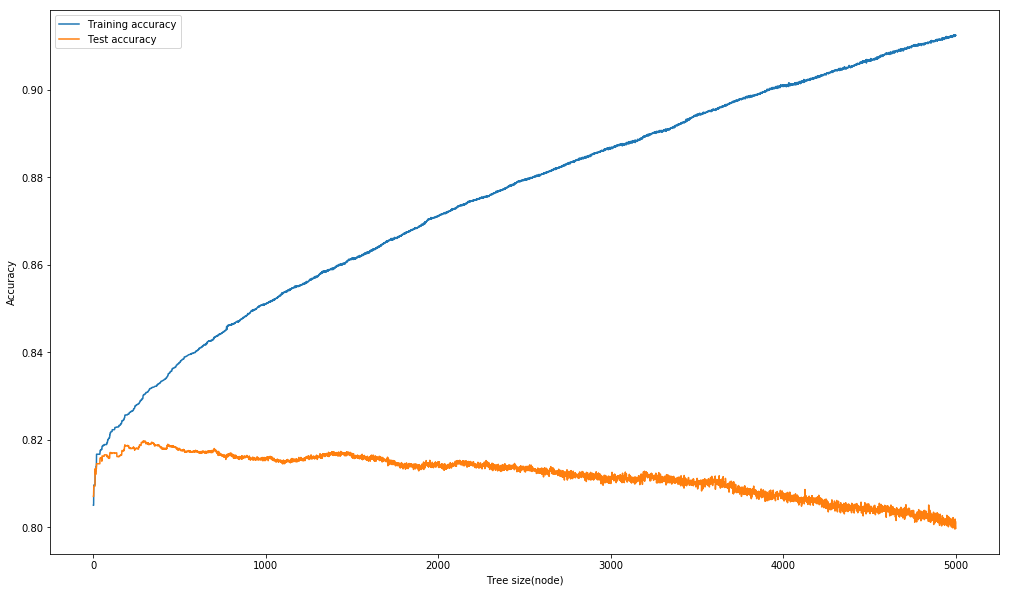

In [10]:
# Drow a plot relating accuracy for training set and test set with tree nodes
from sklearn.metrics import accuracy_score
acc_train = []
acc_test = []
for i in range(2, 5000):
    dt_plot = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = i)
    dt_plot.fit(data_train.drop(['result'], axis = 1), data_train['result'])
    acc_train.append(accuracy_score(data_train['result'], 
                                    dt_plot.predict(data_train.drop(['result'], axis = 1))))
    acc_test.append(accuracy_score(data_test['result'], 
                                    dt_plot.predict(data_test.drop(['result'], axis = 1))))
x_axis = np.array(range(2, 5000))
fig_dt = plt.figure(figsize = (17,10))
plt.plot(x_axis, acc_train, label = 'Training accuracy')
plt.plot(x_axis, acc_test, label = 'Test accuracy')
plt.xlabel("Tree size(node)")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Find the tree nodes number that output the best test set prediction accuracy rate
index_max = list(range(2,5000))[np.argmax(acc_test)]
print(str(index_max) + ' has best performace with a accuracy score ' + str(np.max(acc_test)))

291 has best performace with a accuracy score 0.8198021099534761


In [13]:
# Now try to plot a profit curve
# Firstly, do a train-test split and train classifiers using the best parameter we have found above
X_train = data_train.drop('result', axis = 1)
Y_train = data_train['result']
X_val = data_val.drop('result', axis = 1)
Y_val = data_val['result']
# Now build a random classifier which predict probability of success randomly
random_df_draft = pd.DataFrame({'result': result[test_index], 
                                'Opportunity Amount': data['Opportunity Amount USD'].iloc[test_index].values})
random_res = np.random.rand(len(test_index))
random_df_draft['Predicted Prob'] = random_res
random_df = random_df_draft.sort_values(by = 'Predicted Prob', ascending = False)

In [14]:
# Create a dataframe with oppurtunity amount and predicted probability of success for each instance
profit_df_dtdraft = pd.DataFrame({'result': result[val_index], 
              'Opportunity Amount': data['Opportunity Amount USD'].iloc[val_index].values})
profit_df_dtdraft['Predicted Prob'] = Result_DT
profit_dt_df = profit_df_dtdraft.sort_values(by = 'Predicted Prob', ascending = False)

# Create a dataframe with oppurtunity amount and predicted probability of success for each instance from lg
profit_df_lgdraft = pd.DataFrame({'result': result[val_index], 
              'Opportunity Amount': data['Opportunity Amount USD'].iloc[val_index].values})
profit_df_lgdraft['Predicted Prob'] = Result_lg
profit_lg_df = profit_df_lgdraft.sort_values(by = 'Predicted Prob', ascending = False)

# Now Gradient Boosting
profit_df_gbcdraft = pd.DataFrame({'result': result[val_index], 
              'Opportunity Amount': data['Opportunity Amount USD'].iloc[val_index].values})
profit_df_gbcdraft['Predicted Prob'] = Result_gbc
profit_gbc_df = profit_df_gbcdraft.sort_values(by = 'Predicted Prob', ascending = False)

# Now Random Forest
profit_df_rfdraft = pd.DataFrame({'result': result[val_index], 
              'Opportunity Amount': data['Opportunity Amount USD'].iloc[val_index].values})
profit_df_rfdraft['Predicted Prob'] = Result_RF
profit_rf_df = profit_df_rfdraft.sort_values(by = 'Predicted Prob', ascending = False)
# Create a function to add a column for cumulative opportunity amount
def add_opportunity_amount(cost, algorithm_df):
    cumulative_profit = []
    gain = algorithm_df['Opportunity Amount'].values
    for i in range(len(gain)):
        if i == 0:
            cumulative_profit.append(gain[0] - cost) # Here assume the very top instance has result success
        else:
            if algorithm_df['result'].iloc[i] == 1:
                cumulative_profit.append(gain[i] + cumulative_profit[i - 1] - cost)
            else:
                cumulative_profit.append(cumulative_profit[i - 1] - cost)
    return cumulative_profit

If we set the cost for every case a fixed value 10000

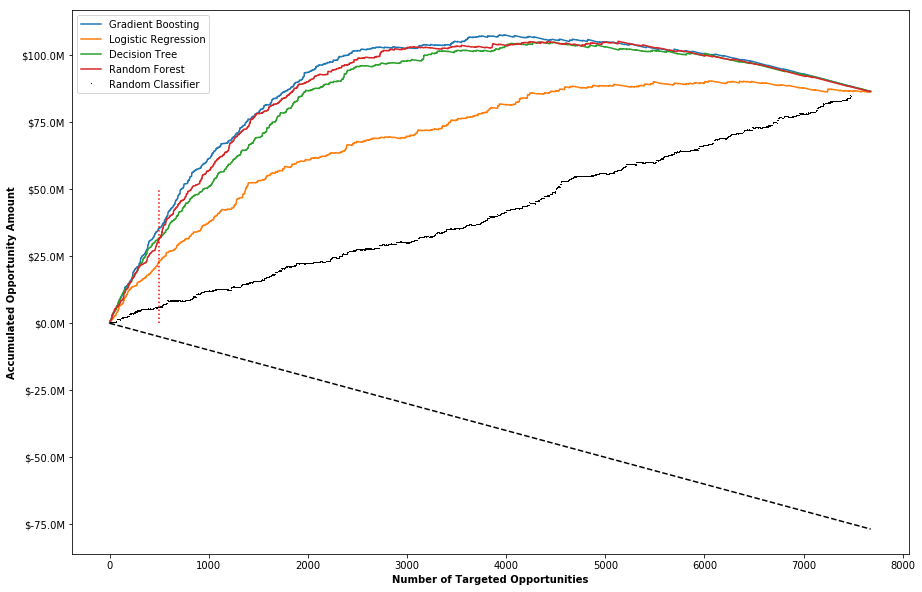

In [15]:
from matplotlib.ticker import FuncFormatter

# Define function for axis labels in million dollars
def millions(x, pos):
    return '$%1.1fM' % (x*1e-6)

f, ax = plt.subplots(figsize=(15,10))
cost = 10000 # Change when changing cost
cumulative_profit_dt = add_opportunity_amount(cost, profit_dt_df)
cumulative_profit_lg = add_opportunity_amount(cost, profit_lg_df)
cumulative_profit_gbc = add_opportunity_amount(cost, profit_gbc_df)
cumulative_profit_rf = add_opportunity_amount(cost, profit_rf_df)
cumulative_profit_random = add_opportunity_amount(cost, random_df)

gbcp = ax.plot(range(len(cumulative_profit_gbc)), cumulative_profit_gbc, label = 'Gradient Boosting')
lgp = ax.plot(range(len(cumulative_profit_lg)), cumulative_profit_lg, label = 'Logistic Regression')
dtp = ax.plot(range(len(cumulative_profit_dt)), cumulative_profit_dt, label = 'Decision Tree')
rfp = ax.plot(range(len(cumulative_profit_rf)), cumulative_profit_rf, label = 'Random Forest')
rdp = ax.plot(range(len(cumulative_profit_random)), cumulative_profit_random, 'k,', label = 'Random Classifier')
profit_500 = ax.plot([500, 500], [0, 50000000], 'r:')
base = ax.plot([0, len(cumulative_profit_dt)], [0, cost * -len(cumulative_profit_dt)], 'k--')

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add axis labels
plt.xlabel("Number of Targeted Opportunities", fontweight = "bold")
plt.ylabel("Accumulated Opportunity Amount", fontweight = "bold")

plt.legend()
plt.show()

If we set a fixed cost for every instance as 20000

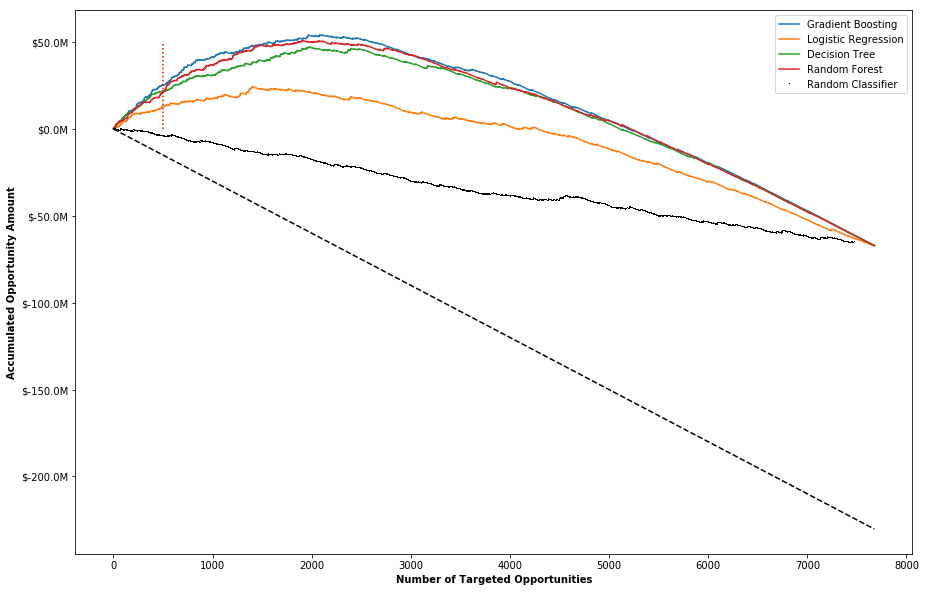

In [16]:
f, ax = plt.subplots(figsize=(15,10))
cost = 30000 # Change when changing cost
cumulative_profit_dt = add_opportunity_amount(cost, profit_dt_df)
cumulative_profit_lg = add_opportunity_amount(cost, profit_lg_df)
cumulative_profit_gbc = add_opportunity_amount(cost, profit_gbc_df)
cumulative_profit_rf = add_opportunity_amount(cost, profit_rf_df)
cumulative_profit_random = add_opportunity_amount(cost, random_df)

gbcp = ax.plot(range(len(cumulative_profit_gbc)), cumulative_profit_gbc, label = 'Gradient Boosting')
lgp = ax.plot(range(len(cumulative_profit_lg)), cumulative_profit_lg, label = 'Logistic Regression')
dtp = ax.plot(range(len(cumulative_profit_dt)), cumulative_profit_dt, label = 'Decision Tree')
rfp = ax.plot(range(len(cumulative_profit_rf)), cumulative_profit_rf, label = 'Random Forest')
rdp = ax.plot(range(len(cumulative_profit_random)), cumulative_profit_random, 'k,', label = 'Random Classifier')
profit_500 = ax.plot([500, 500], [0, 50000000], 'r:')
base = ax.plot([0, len(cumulative_profit_dt)], [0, cost * -len(cumulative_profit_dt)], 'k--')

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add axis labels
plt.xlabel("Number of Targeted Opportunities", fontweight = "bold")
plt.ylabel("Accumulated Opportunity Amount", fontweight = "bold")

plt.legend()
plt.show()

In [17]:
# Now try to plot a profit curve which rank instances by Opportunity Amount * possibilities
# First Decision Tree
profit_df_dtdraft['Weighted Amount'] = Result_DT * profit_df_dtdraft['Opportunity Amount']
profit_dt_df2 = profit_df_dtdraft.sort_values(by = 'Weighted Amount', ascending = False)
# Then logistic regression
profit_df_lgdraft['Weighted Amount'] = Result_lg * profit_df_lgdraft['Opportunity Amount']
profit_lg_df2 = profit_df_lgdraft.sort_values(by = 'Weighted Amount', ascending = False)
# And also a random classifier
random_df_draft['Weighted Amount'] = random_res * random_df_draft['Opportunity Amount']
random_df2 = random_df_draft.sort_values(by = 'Weighted Amount', ascending = False)
# And also Gradient Boosting
profit_df_gbcdraft['Weighted Amount'] = Result_gbc * profit_df_gbcdraft['Opportunity Amount']
profit_gbc_df2 = profit_df_gbcdraft.sort_values(by = 'Weighted Amount', ascending = False)
# And also Random Forest
profit_df_rfdraft['Weighted Amount'] = Result_RF * profit_df_rfdraft['Opportunity Amount']
profit_rf_df2 = profit_df_rfdraft.sort_values(by = 'Weighted Amount', ascending = False)

If we rank instances by weighted amount(opportunity amount * probability to win) and set cost to be a fiexed value 10000.

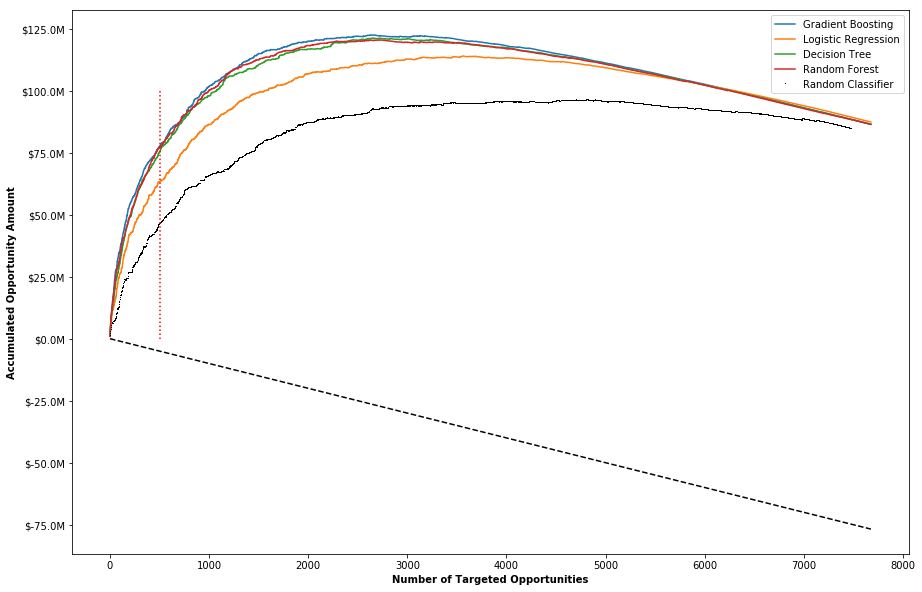

In [18]:
f, ax = plt.subplots(figsize=(15,10))
cost = 10000 # Change when changing cost
cumulative_profit_dt2 = add_opportunity_amount(cost, profit_dt_df2)
cumulative_profit_lg2 = add_opportunity_amount(cost, profit_lg_df2)
cumulative_profit_gbc2 = add_opportunity_amount(cost, profit_gbc_df2)
cumulative_profit_rf2 = add_opportunity_amount(cost, profit_rf_df2)
cumulative_profit_random2 = add_opportunity_amount(cost, random_df2)

gbcp = ax.plot(range(len(cumulative_profit_gbc2)), cumulative_profit_gbc2, label = 'Gradient Boosting')
lgp = ax.plot(range(len(cumulative_profit_lg2)), cumulative_profit_lg2, label = 'Logistic Regression')
dtp = ax.plot(range(len(cumulative_profit_dt2)), cumulative_profit_dt2, label = 'Decision Tree')
rfp = ax.plot(range(len(cumulative_profit_rf2)), cumulative_profit_rf2, label = 'Random Forest')
rdp = ax.plot(range(len(cumulative_profit_random2)), cumulative_profit_random2, 'k,', label = 'Random Classifier')
profit_500 = ax.plot([500, 500], [0, 100000000], 'r:')
base = ax.plot([0, len(cumulative_profit_dt2)], [0, cost * -len(cumulative_profit_dt2)], 'k--')

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add axis labels
plt.xlabel("Number of Targeted Opportunities", fontweight = "bold")
plt.ylabel("Accumulated Opportunity Amount", fontweight = "bold")

plt.legend()
plt.show()

If we rank instances by weighted amount(opportunity amount * probability to win) and set cost to be a fiexed value 30000.

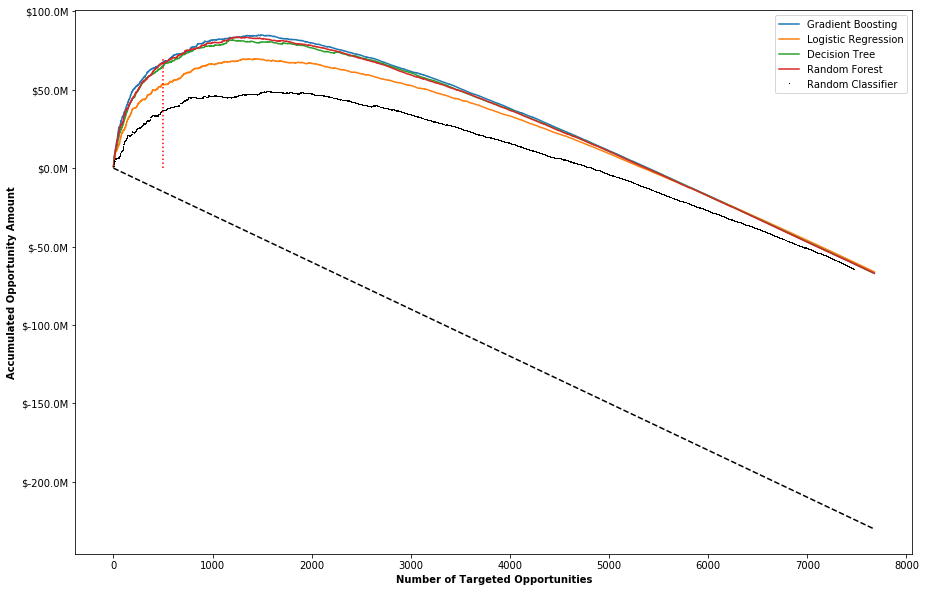

In [19]:
f, ax = plt.subplots(figsize=(15,10))
cost = 30000 # Change when changing cost
cumulative_profit_dt2 = add_opportunity_amount(cost, profit_dt_df2)
cumulative_profit_lg2 = add_opportunity_amount(cost, profit_lg_df2)
cumulative_profit_gbc2 = add_opportunity_amount(cost, profit_gbc_df2)
cumulative_profit_rf2 = add_opportunity_amount(cost, profit_rf_df2)
cumulative_profit_random2 = add_opportunity_amount(cost, random_df2)

gbcp = ax.plot(range(len(cumulative_profit_gbc2)), cumulative_profit_gbc2, label = 'Gradient Boosting')
lgp = ax.plot(range(len(cumulative_profit_lg2)), cumulative_profit_lg2, label = 'Logistic Regression')
dtp = ax.plot(range(len(cumulative_profit_dt2)), cumulative_profit_dt2, label = 'Decision Tree')
rfp = ax.plot(range(len(cumulative_profit_rf2)), cumulative_profit_rf2, label = 'Random Forest')
rdp = ax.plot(range(len(cumulative_profit_random2)), cumulative_profit_random2, 'k,', label = 'Random Classifier')
profit_500 = ax.plot([500, 500], [0, 70000000], 'r:')
base = ax.plot([0, len(cumulative_profit_dt2)], [0, cost * -len(cumulative_profit_dt2)], 'k--')

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add axis labels
plt.xlabel("Number of Targeted Opportunities", fontweight = "bold")
plt.ylabel("Accumulated Opportunity Amount", fontweight = "bold")

plt.legend()
plt.show()

# Now let's try not to use fixed value for cost, use a function where the cost = base_rate + (some ratio) * opportunity Amount.

In [20]:
# Write a different function so that cost is calculated by a base cost plus a ratio of possible 
# Opportunity Amount
def add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, algorithm_df):
    cumulative_profit = []
    gain = algorithm_df['Opportunity Amount'].values
    for i in range(len(gain)):
        cost = base_cost + cost_ratio * gain[i]
        if i == 0:
            cumulative_profit.append(gain[0] - cost) # Here assume the very top instance has result success
        else:
            if algorithm_df['result'].iloc[i] == 1:
                cumulative_profit.append(gain[i] + cumulative_profit[i - 1] - cost)
            else:
                cumulative_profit.append(cumulative_profit[i - 1] - cost)
    return cumulative_profit

When using base rate as 5000 and ratio as 0.2.

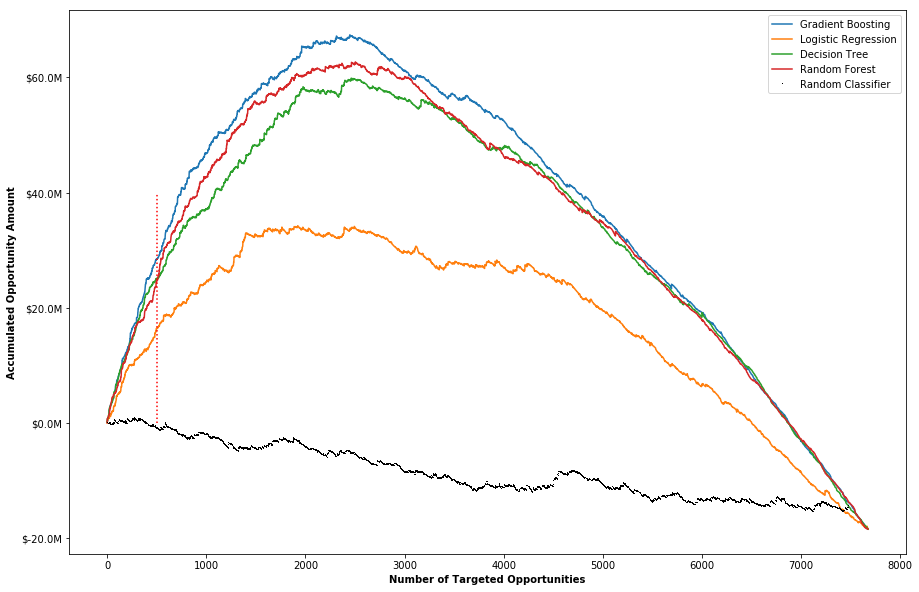

In [21]:
f, ax = plt.subplots(figsize=(15,10))
base_cost = 5000 # Change when changing cost
cost_ratio = 0.20 # Change when changing cost
cumulative_profit_dt = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_dt_df)
cumulative_profit_lg = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_lg_df)
cumulative_profit_gbc = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_gbc_df)
cumulative_profit_rf = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_rf_df)
cumulative_profit_random = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, random_df)

gbcp = ax.plot(range(len(cumulative_profit_gbc)), cumulative_profit_gbc, label = 'Gradient Boosting')
lgp = ax.plot(range(len(cumulative_profit_lg)), cumulative_profit_lg, label = 'Logistic Regression')
dtp = ax.plot(range(len(cumulative_profit_dt)), cumulative_profit_dt, label = 'Decision Tree')
rfp = ax.plot(range(len(cumulative_profit_rf)), cumulative_profit_rf, label = 'Random Forest')
profit_500 = ax.plot([500, 500], [0, 40000000], 'r:')
rdp = ax.plot(range(len(cumulative_profit_random)), cumulative_profit_random, 'k,', label = 'Random Classifier')

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add axis labels
plt.xlabel("Number of Targeted Opportunities", fontweight = "bold")
plt.ylabel("Accumulated Opportunity Amount", fontweight = "bold")

plt.legend()
plt.show()

When using the same base rate and raio but rank the instances by weighted amount.

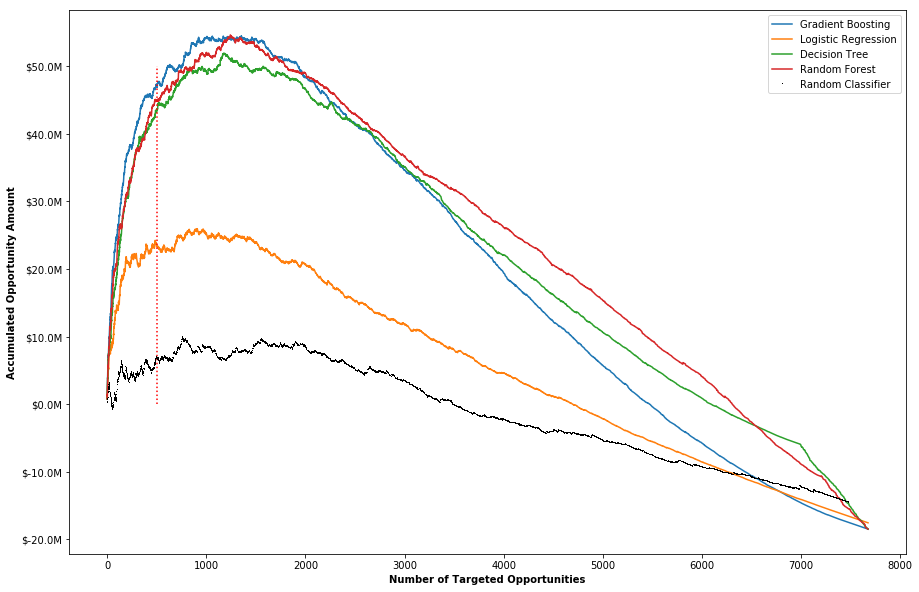

In [22]:
# Plot for the Weighted Amount(Opportunity Amount * probability)
f, ax = plt.subplots(figsize=(15,10))
base_cost = 5000 # Change when changing cost
cost_ratio = 0.20 # Change when changing cost
cumulative_profit_dt = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_dt_df2)
cumulative_profit_lg = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_lg_df2)
cumulative_profit_gbc = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_gbc_df2)
cumulative_profit_rf = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_rf_df2)
cumulative_profit_random = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, random_df2)

gbcp = ax.plot(range(len(cumulative_profit_gbc)), cumulative_profit_gbc, label = 'Gradient Boosting')
lgp = ax.plot(range(len(cumulative_profit_lg)), cumulative_profit_lg, label = 'Logistic Regression')
dtp = ax.plot(range(len(cumulative_profit_dt)), cumulative_profit_dt, label = 'Decision Tree')
rfp = ax.plot(range(len(cumulative_profit_rf)), cumulative_profit_rf, label = 'Random Forest')
profit_500 = ax.plot([500, 500], [0, 50000000], 'r:')
rdp = ax.plot(range(len(cumulative_profit_random)), cumulative_profit_random, 'k,', label = 'Random Classifier')

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add axis labels
plt.xlabel("Number of Targeted Opportunities", fontweight = "bold")
plt.ylabel("Accumulated Opportunity Amount", fontweight = "bold")

plt.legend()
plt.show()

# Now use Gradient boosting to fit on (training + validation) and get the result

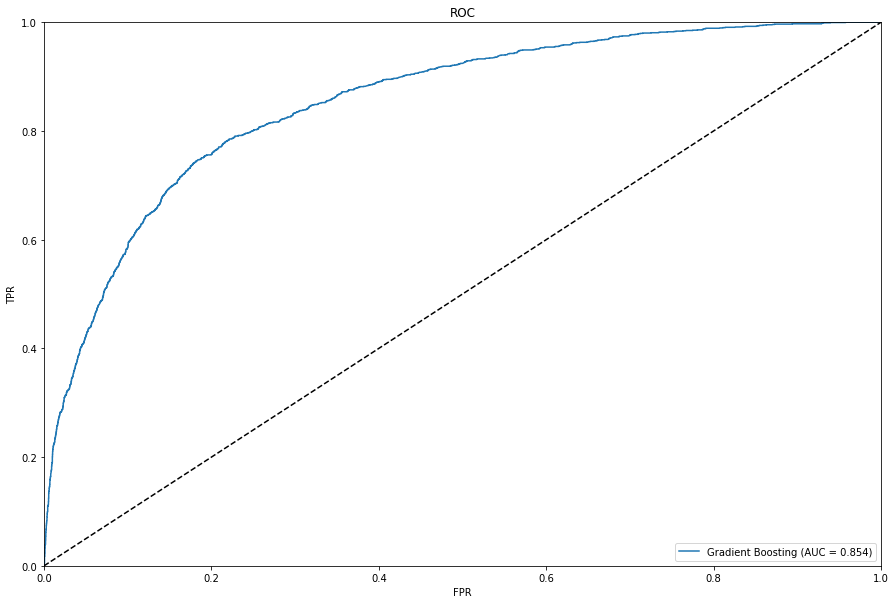

In [23]:
data_trainval = data_clean.iloc[train_index + val_index, :]
final_gbc = GBC(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='exponential', max_depth=3,
                max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=30, min_samples_split=300,
                min_weight_fraction_leaf=0.0, n_estimators=2000,
                presort='auto', random_state=None, subsample=1.0, verbose=0,
                warm_start=False) 
final_gbc.fit(data_trainval.drop(['result'], axis = 1), data_trainval['result'])
final_result = final_gbc.predict_proba(data_test.drop(['result'], axis = 1))[:, 1]
# Plot
fig = plt.figure(figsize = (15, 10))
plotROC(final_result, data_test['result'], 'Gradient Boosting')
plt.show()

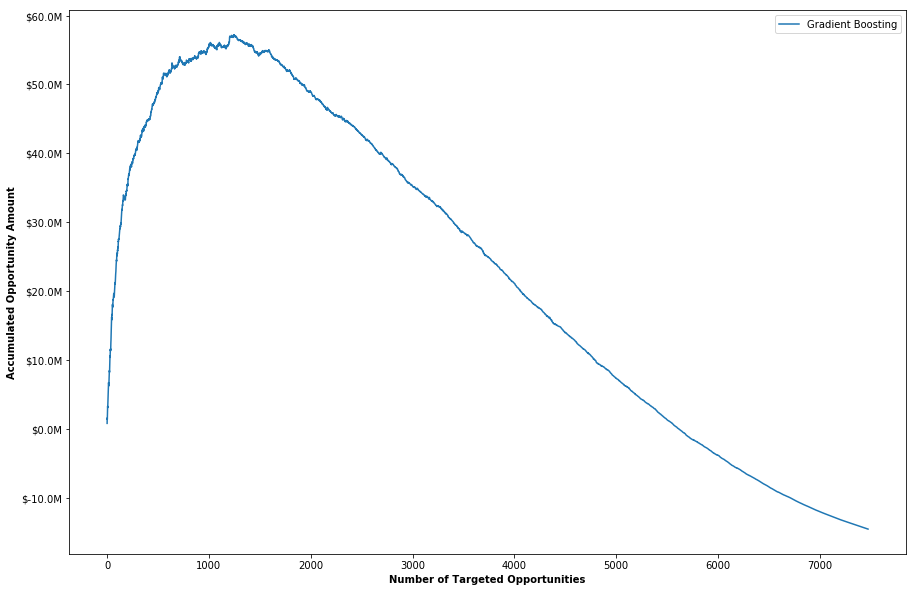

In [25]:
# A Profit curve for gradient boosting
# Plot for the Weighted Amount(Opportunity Amount * probability)
f, ax = plt.subplots(figsize=(15,10))
profit_final = pd.DataFrame({'result': result[test_index], 
              'Opportunity Amount': data['Opportunity Amount USD'].iloc[test_index].values})
profit_final['Predicted Prob'] = final_result
profit_final['Weighted Amount'] = final_result * profit_final['Opportunity Amount']
profit_gbc_df3 = profit_final.sort_values(by = 'Weighted Amount', ascending = False)
base_cost = 5000 # Change when changing cost
cost_ratio = 0.20 # Change when changing cost
#cumulative_profit_dt = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_dt_df2)
#cumulative_profit_lg = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_lg_df2)
cumulative_profit_gbc = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_gbc_df3)
#cumulative_profit_rf = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, profit_rf_df2)
#cumulative_profit_random = add_opportunity_amount_with_new_cost_method(base_cost, cost_ratio, random_df2)

gbcp = ax.plot(range(len(cumulative_profit_gbc)), cumulative_profit_gbc, label = 'Gradient Boosting')
#lgp = ax.plot(range(len(cumulative_profit_lg)), cumulative_profit_lg, label = 'Logistic Regression')
#dtp = ax.plot(range(len(cumulative_profit_dt)), cumulative_profit_dt, label = 'Decision Tree')
#rfp = ax.plot(range(len(cumulative_profit_rf)), cumulative_profit_rf, label = 'Random Forest')
#profit_500 = ax.plot([500, 500], [0, 50000000], 'r:')
#rdp = ax.plot(range(len(cumulative_profit_random)), cumulative_profit_random, 'k,', label = 'Random Classifier')

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add axis labels
plt.xlabel("Number of Targeted Opportunities", fontweight = "bold")
plt.ylabel("Accumulated Opportunity Amount", fontweight = "bold")

plt.legend()
plt.show()

In [103]:
# Use Grid Search to find best parameters for Decision Tree
from sklearn.model_selection import GridSearchCV
min_samples_split = [100 * i for i in range(1, 31)]
min_samples_leaf = [10 * i for i in range(1, 11)]
gs_dt = DecisionTreeClassifier()
param_dist = {'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(gs_dt, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_dt.fit(data_train.drop(['result'], axis = 1), data_train['result'])

print('Best Parameters using grid search: \n',
      cv_dt.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 60, 'min_samples_split': 100}


In [174]:
# Feature importance of Decision Tree
imp = dict(zip(data_clean.columns[0: -1], [[i] for i in DT.feature_importances_]))
imp = pd.DataFrame(imp).transpose().sort_values(by = 0, ascending = False)
list_to_rm = set(data_clean.columns) - set(imp.iloc[:22].index) - set(['result'])

In [175]:
data_fi = data_clean.drop(list(list_to_rm), axis = 1)

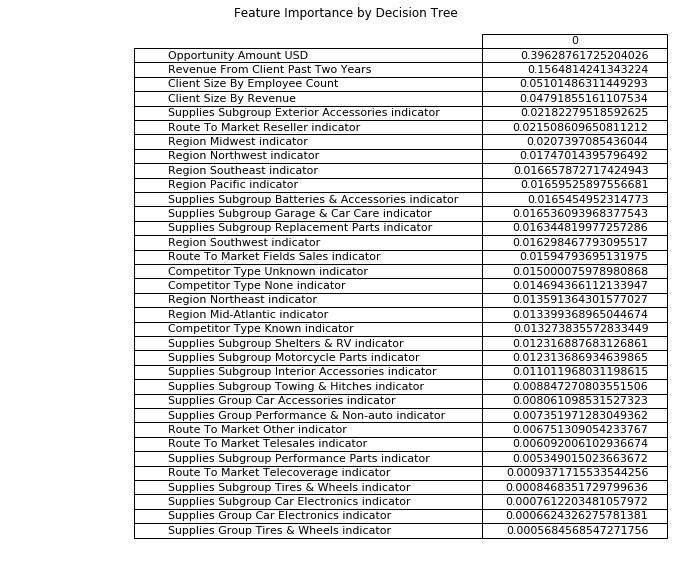

In [176]:
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(12, 10)) # set size frame 
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, imp, loc='upper right', colWidths=[0.23]*len(imp.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(11) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table
plt.title('Feature Importance by Decision Tree')
#plt.savefig('table.png', transparent=True)
plt.show()

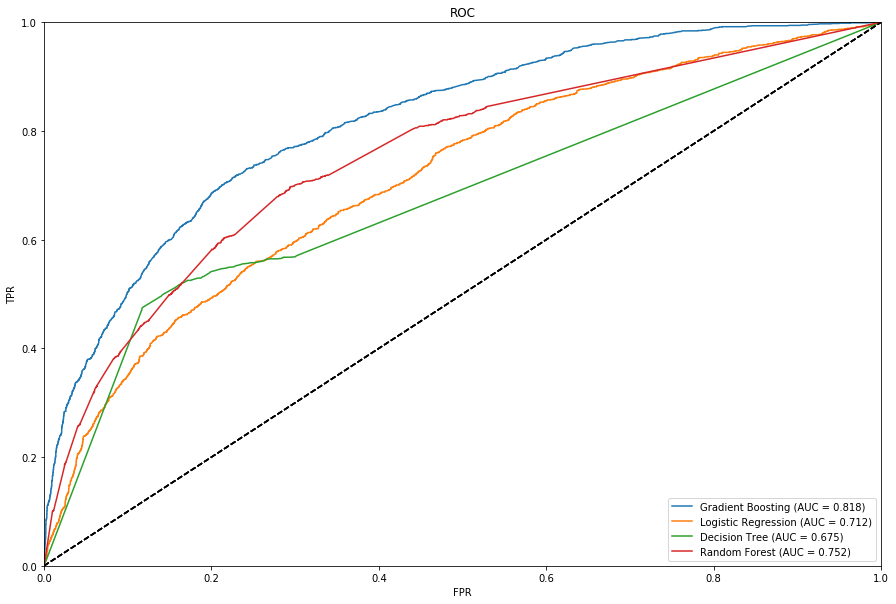

In [179]:
# Split data into training and test
fi_train = data_fi.iloc[train_index, :]
fi_test = data_fi.iloc[val_index, :]
# Firstly, run a Logistic Regression
lg_fi = linear_model.LogisticRegression()
lg_fi.fit(fi_train.drop(['result'], axis = 1), fi_train['result'])
fi_lg = lg_fi.predict_proba(fi_test.drop(['result'], axis = 1))[:, 1]
# And Decision Tree
DT_fi = DecisionTreeClassifier()
DT_fi.fit(fi_train.drop(['result'], axis = 1), fi_train['result'])
fi_DT = DT_fi.predict_proba(fi_test.drop(['result'], axis = 1))[:, 1]
# And Gradient Boosting
gra_boost_fi = GBC() 
gra_boost_fi.fit(fi_train.drop(['result'], axis = 1), fi_train['result'])
fi_gbc = gra_boost_fi.predict_proba(fi_test.drop(['result'], axis = 1))[:, 1]
# And Random Forest
RF_fi = RandomForestClassifier()
# Train the model
RF_fi.fit(fi_train.drop("result", 1), fi_train['result'])
# Make predictions
fi_RF = RF_fi.predict_proba(fi_test.drop("result", 1))[:,1]

# Plot ROC for all models
fig = plt.figure(figsize = (15, 10))
plotROC(fi_gbc, fi_test['result'], 'Gradient Boosting')
plotROC(fi_lg, fi_test['result'], 'Logistic Regression')
plotROC(fi_DT, fi_test['result'], 'Decision Tree')
plotROC(fi_RF, fi_test['result'], 'Random Forest')
plt.show()

In [27]:
# Mutual information
from sklearn.feature_selection import mutual_info_classif as mic
mi_list = mic(data_clean.drop('result', axis = 1).values, data_clean['result'].values)
mi_list = list(mi_list)
mi_dict = dict(zip(data_clean.columns[0: -1], mi_list))

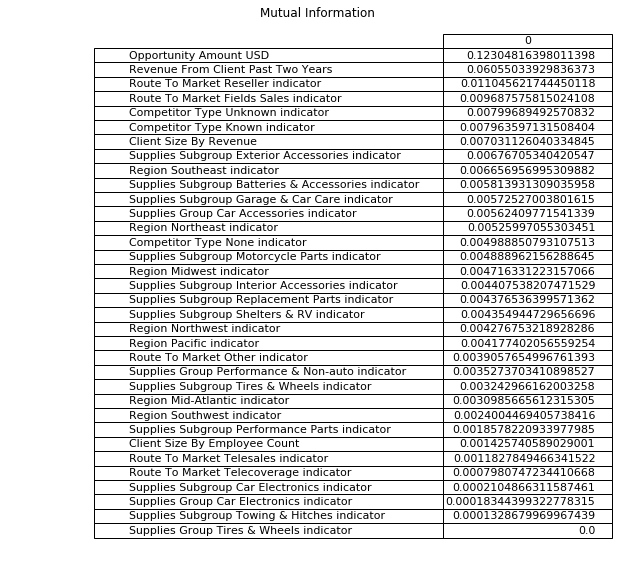

In [30]:
from pandas.plotting import table
mi_df = pd.DataFrame.from_dict(mi_dict, orient = 'index').sort_values(by = 0, ascending = False)

fig, ax = plt.subplots(figsize=(11, 10)) # set size frame 
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, mi_df, loc='upper right', colWidths=[0.23]*len(mi_df.columns))
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(11) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table
plt.title('Mutual Information')
#plt.savefig('table.png', transparent=True)
plt.show()

In [31]:
mi_to_rm = set(data_clean.columns) - set(mi_df.iloc[:4].index) - set(['result'])
data_mi = data_clean.drop(mi_to_rm, axis = 1)

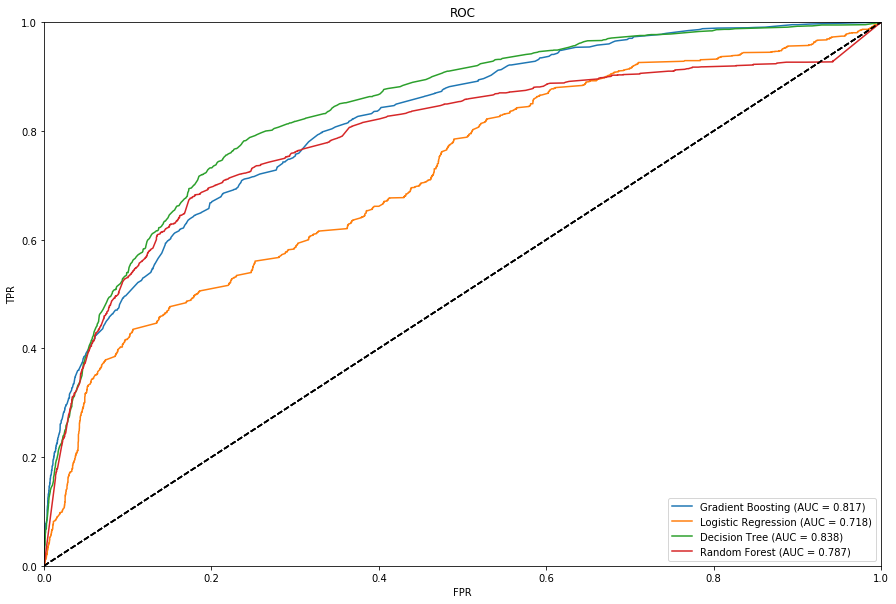

In [33]:
# Split data into training and test
mi_train = data_mi.iloc[train_index, :]
mi_test = data_mi.iloc[val_index, :]
# mirstly, run a Logistic Regression
lg_mi = linear_model.LogisticRegression()
lg_mi.fit(mi_train.drop(['result'], axis = 1), mi_train['result'])
mi_lg = lg_mi.predict_proba(mi_test.drop(['result'], axis = 1))[:, 1]
# And Decision Tree
DT_mi = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, min_samples_split = 100)
DT_mi.fit(mi_train.drop(['result'], axis = 1), mi_train['result'])
mi_DT = DT_mi.predict_proba(mi_test.drop(['result'], axis = 1))[:, 1]
# And Gradient Boosting
gra_boost_mi = GBC() 
gra_boost_mi.fit(mi_train.drop(['result'], axis = 1), mi_train['result'])
mi_gbc = gra_boost_mi.predict_proba(mi_test.drop(['result'], axis = 1))[:, 1]
# And Random Forest
RF_mi = RandomForestClassifier()
# Train the model
RF_mi.fit(mi_train.drop("result", 1), mi_train['result'])
# Make predictions
mi_RF = RF_mi.predict_proba(mi_test.drop("result", 1))[:,1]

# Plot ROC for all models
fig = plt.figure(figsize = (15, 10))
plotROC(mi_gbc, mi_test['result'], 'Gradient Boosting')
plotROC(mi_lg, mi_test['result'], 'Logistic Regression')
plotROC(mi_DT, mi_test['result'], 'Decision Tree')
plotROC(mi_RF, mi_test['result'], 'Random Forest')
plt.show()

In [104]:
# Do a grid search for decision tree using mutual information
from sklearn.model_selection import GridSearchCV
min_samples_split = [100 * i for i in range(1, 31)]
min_samples_leaf = [10 * i for i in range(1, 11)]
gs_dt_mi = DecisionTreeClassifier()
param_dist = {'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_dt_mi = GridSearchCV(gs_dt_mi, cv = 3,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_dt_mi.fit(mi_train.drop(['result'], axis = 1), mi_train['result'])

print('Best Parameters using grid search: \n',
      cv_dt_mi.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 100}


In [105]:
# Grid Search on Decision Tree FI
gs_dt_fi = DecisionTreeClassifier()
param_dist = {'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_dt_fi = GridSearchCV(gs_dt_fi, cv = 3,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_dt_fi.fit(fi_train.drop(['result'], axis = 1), fi_train['result'])

print('Best Parameters using grid search: \n',
      cv_dt_fi.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_features': None, 'min_samples_leaf': 30, 'min_samples_split': 300}


In [35]:
# Do grid search on Logistic Regression MI
from sklearn.model_selection import GridSearchCV
gs_lg = linear_model.LogisticRegression()
param_dist = {'fit_intercept': [True, False],
              'C': [10 ** i for i in range(9)],
              'class_weight': ['balanced', None],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

cv_lg = GridSearchCV(gs_lg, cv = 3,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_lg.fit(mi_train.drop(['result'], axis = 1), mi_train['result'])

print('Best Parameters using grid search: \n',
      cv_lg.best_params_)

/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Best Parameters using grid search: 
 {'C': 1, 'class_weight': None, 'fit_intercept': True, 'solver': 'newton-cg'}


In [38]:
# Grid search for gradient boosting
gs_gbc = GBC()
min_samples_split = [100 * i for i in range(1, 5)]
min_samples_leaf = [10 * i for i in range(1, 7)]
param_dist = {'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': ['auto', 'sqrt', 'log2', None],
              'loss' : ['deviance', 'exponential'], 
              'n_estimators': [100, 500, 1500, 2000]}

cv_gbc = GridSearchCV(gs_gbc, cv = 3,
                     param_grid=param_dist,
                     n_jobs = 3, verbose = 10)

cv_gbc.fit(mi_train.drop(['result'], axis = 1), mi_train['result'])

print('Best Parameters using grid search: \n',
      cv_gbc.best_params_)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100, score=0.8253232014210994, total=   3.3s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100, score=0.8076581466495608, total=   3.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100, score=0.8196397730076487, total=   3.7s
[CV] 

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    3.8s


[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500, score=0.8085956774893911, total=  11.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500, score=0.8253145817912657, total=  11.0s
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500, score=0.8303069179907234, total=  11.1s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1500 
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1500, score=0.8082009276620942, total=  32.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, ma

[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   48.2s


[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1500, score=0.8259560819146311, total=  33.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, score=0.8095332083292214, total=  39.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, score=0.8326260732260929, total=  39.3s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, score=0.8255613126079447, total=  39.3s
[CV] loss=deviance, ma

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.5min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.8081022402052699, total=   2.5s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.8251258265074509, total=   2.4s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.8193436960276339, total=   2.4s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=500, score=0.8081022402052699, total=  10.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=1500 
[CV]  loss=deviance, max_fe

[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  2.2min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=1500, score=0.8330208230533899, total=  29.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=1500, score=0.8250678509745867, total=  28.9s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=2000, score=0.8109148327247607, total=  38.8s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=200, n_estimators=2000, score=0.8251665433012584, total=  39.2s
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=100, score=0.8082009276620

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.9min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=500, score=0.8078061778347972, total=  10.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=500, score=0.830158886805487, total=  11.3s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=500, score=0.8255119664446089, total=  11.3s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=1500, score=0.8100759893417546, total=  34.8s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  4.5min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=2000, score=0.8317378861146748, total=  43.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=2000, score=0.8247224278312362, total=  43.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=100, score=0.8244350143096812, total=   2.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=100, score=0.8191463113742906, total=   2.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=500 
[CV]  loss=deviance, max_f

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  5.2min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=1500, score=0.8238341968911918, total=  31.8s
[CV] loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.8097305832428698, total=  40.3s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.8321326359419717, total=  39.8s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=100, score=0.8077568341063851, total=   2.3s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max

[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  6.6min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=1500, score=0.8311951051021416, total=  28.9s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=1500, score=0.8254626202812732, total=  30.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=2000, score=0.8108161452679364, total=  48.5s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=2000, score=0.8325273857692688, total=  48.1s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, m

[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  7.7min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.8093358334155729, total=  32.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.830158886805487, total=  34.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.8250185048112509, total=  33.3s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=200, n_estimators=2000, score=0.8104213954406395, total=  59.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, m

[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed: 10.5min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=1500, score=0.8290239810520083, total=  54.7s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=1500, score=0.8245743893412287, total=  54.5s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=2000, score=0.811457613737294, total= 1.4min
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=100, score=0.8073620842790882, total=   3.9s
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max

[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 13.5min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=1500, score=0.82526523562793, total= 1.1min
[CV] loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=2000, score=0.8111615513668213, total= 1.2min
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=2000, score=0.8311457613737294, total= 1.2min
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=100, score=0.8081022402052699, total=   3.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_f

[Parallel(n_jobs=3)]: Done 107 tasks      | elapsed: 17.1min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=2000, score=0.8310964176453173, total= 1.2min
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=2000, score=0.8257586972612879, total= 1.2min
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=100, score=0.8248791078653903, total=   3.5s
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=100, score=0.8188502343942758, total=   3.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_f

[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed: 19.8min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=100, score=0.8189982728842833, total=   4.1s
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=500, score=0.8074607717359124, total=  18.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=500, score=0.8304549491759597, total=  17.8s
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=500, score=0.826005428077967, total=  17.7s
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_f

[Parallel(n_jobs=3)]: Done 139 tasks      | elapsed: 23.4min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=400, n_estimators=1500, score=0.8305536366327839, total=  54.5s
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=400, n_estimators=1500, score=0.8243276585245497, total=  55.4s
[CV] loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=30, min_samples_split=400, n_estimators=2000, score=0.8089410835882759, total= 1.3min
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100, score=0.808151583933682, total=   4.4s
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max

[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 27.3min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=2000, score=0.8246237355045645, total= 1.1min
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.8248297641369782, total=   3.8s
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.8195410806809771, total=   4.1s
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=500, score=0.8069673344517911, total=  17.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=200, n_estimators=1500 
[CV]  loss=deviance, max_f

[Parallel(n_jobs=3)]: Done 175 tasks      | elapsed: 30.9min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=1500, score=0.8304056054475476, total=  53.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=1500, score=0.8264001973846533, total=  52.7s
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=2000, score=0.808546333760979, total= 1.0min
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=2000, score=0.8310964176453173, total= 1.1min
[CV] loss=deviance, max_features=auto, min_samples_leaf=40, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, ma

[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 34.5min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=0.8194423883543055, total=   3.8s
[CV] loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500, score=0.8076581466495608, total=  16.9s
[CV] loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500, score=0.830948386460081, total=  17.4s
[CV] loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500, score=0.8254626202812732, total=  17.4s
[CV] loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_f

[Parallel(n_jobs=3)]: Done 215 tasks      | elapsed: 39.3min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=100, score=0.8076581466495608, total=   3.9s
[CV] loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=100, score=0.8244350143096812, total=   4.0s
[CV] loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=2000, score=0.8256600049346163, total= 1.1min
[CV] loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=100, score=0.819047619047619, total=   3.8s
[CV] loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_fea

[Parallel(n_jobs=3)]: Done 236 tasks      | elapsed: 43.2min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=1500, score=0.8255119664446089, total= 1.0min
[CV] loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=2000, score=0.8080528964768577, total= 1.4min
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=2000, score=0.830158886805487, total= 1.4min
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=100, n_estimators=100, score=0.8076088029211487, total=   5.6s
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_

[Parallel(n_jobs=3)]: Done 259 tasks      | elapsed: 49.0min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=1500, score=0.8268443128546755, total= 1.0min
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=1500, score=0.8318859172999111, total= 1.0min
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=2000, score=0.8086943649462154, total= 1.3min
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=2000, score=0.8264495435479892, total= 1.3min
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, m

[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed: 53.3min


[CV]  loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8067206158097305, total=  54.4s
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8315405112010263, total=  54.4s
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8267949666913398, total=  53.8s
[CV] loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=2000, score=0.8066219283529064, total= 1.1min
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, 

[Parallel(n_jobs=3)]: Done 307 tasks      | elapsed: 58.8min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=1500, score=0.8282838251258265, total=  40.0s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=1500, score=0.8244756970145571, total=  40.0s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=2000, score=0.8073620842790882, total=  53.6s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=2000, score=0.829320043422481, total=  53.7s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, ma

[Parallel(n_jobs=3)]: Done 332 tasks      | elapsed: 62.7min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=400, n_estimators=1500, score=0.82526523562793, total=  40.6s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.8067699595381427, total=  56.6s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.827642356656469, total=  56.8s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=100, score=0.8070660219086154, total=   2.7s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_fe

[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed: 67.6min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=100, score=0.8072140530938517, total=   2.5s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=200, n_estimators=2000, score=0.8258573895879595, total=  52.8s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=100, score=0.8207342346787724, total=   2.6s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=100, score=0.818307426597582, total=   2.7s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_fea

[Parallel(n_jobs=3)]: Done 386 tasks      | elapsed: 71.5min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=100, score=0.8179620034542314, total=   2.7s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8058324286983124, total=  13.1s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8282838251258265, total=  13.2s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8247717739945719, total=  13.2s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_

[Parallel(n_jobs=3)]: Done 415 tasks      | elapsed: 76.2min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.8286785749531235, total=  40.2s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.8243770046878856, total=  40.6s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=2000, score=0.8065232408960821, total=  53.1s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=2000, score=0.8278397315701175, total=  52.9s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=30, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, m

[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 80.9min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.8212770156913056, total=   2.6s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=2000, score=0.8261041204046385, total=  51.5s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.817813964964224, total=   2.9s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=500, score=0.806029803611961, total=  14.0s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=1500 
[CV]  loss=deviance, max_fea

[Parallel(n_jobs=3)]: Done 475 tasks      | elapsed: 85.5min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=1500, score=0.8281851376690023, total=  40.8s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=1500, score=0.8248211201579078, total=  41.2s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.8061778347971973, total=  49.3s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.8281357939405901, total=  49.2s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, m

[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed: 90.4min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=100, score=0.817813964964224, total=   3.1s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=500, score=0.804401460574361, total=  13.3s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=500, score=0.8271489193723478, total=  13.4s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=500, score=0.8243276585245497, total=  13.2s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_fe

[Parallel(n_jobs=3)]: Done 539 tasks      | elapsed: 96.0min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=200, n_estimators=100, score=0.806868646994967, total=   2.7s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=100, n_estimators=2000, score=0.8251665433012584, total=  50.6s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=200, n_estimators=100, score=0.8215237343333662, total=   2.8s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=200, n_estimators=100, score=0.8179620034542314, total=   2.8s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_fea

[Parallel(n_jobs=3)]: Done 572 tasks      | elapsed: 100.7min


[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8248211201579078, total=  40.2s
[CV] loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=400, n_estimators=2000, score=0.806868646994967, total=  49.6s
[CV] loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100, score=0.8069179907233791, total=   2.5s
[CV] loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=sqrt, min_samples_leaf=60, min_samples_split=400, n_estimators=2000, score=0.8280864502121781, total=  49.8s
[CV] loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_

[CV]  loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=300, n_estimators=1500, score=0.8076581466495608, total=  40.0s
[CV] loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=300, n_estimators=2000 


[Parallel(n_jobs=3)]: Done 607 tasks      | elapsed: 106.3min


[CV]  loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=300, n_estimators=1500, score=0.8295667620645416, total=  40.0s
[CV] loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=300, n_estimators=1500, score=0.82526523562793, total=  40.7s
[CV] loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=300, n_estimators=2000, score=0.8071153656370276, total=  50.4s
[CV] loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=300, n_estimators=2000, score=0.8288759498667719, total=  51.1s
[CV] loss=deviance, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max

[CV]  loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=500, score=0.8241796200345423, total=  13.9s
[CV] loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=1500 


[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed: 111.2min


[CV]  loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.8065725846244942, total=  41.2s
[CV] loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.8287279186815356, total=  41.3s
[CV] loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.8247717739945719, total=  41.1s
[CV] loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=2000, score=0.8076088029211487, total=  52.7s
[CV] loss=deviance, max_features=log2, min_samples_leaf=20, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, 

[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8284318563110629, total=  13.5s
[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8238341968911918, total=  13.5s
[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=1500, score=0.8066712720813185, total=  42.1s
[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=1500, score=0.8290733247804204, total=  41.3s


[Parallel(n_jobs=3)]: Done 679 tasks      | elapsed: 117.7min


[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=1500, score=0.8243770046878856, total=  41.3s
[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=2000, score=0.8293693871508931, total=  49.6s
[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=2000, score=0.8078555215632093, total=  50.1s
[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=2000, score=0.826252158894646, total=  50.3s
[CV] loss=deviance, max

[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=1500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=1500, score=0.8065725846244942, total=  39.7s
[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=1500, score=0.8297147932497779, total=  40.1s
[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=2000 


[Parallel(n_jobs=3)]: Done 716 tasks      | elapsed: 123.3min


[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=1500, score=0.8264001973846533, total=  41.2s
[CV] loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=2000, score=0.8067206158097305, total=  50.9s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=100, n_estimators=100, score=0.8054376788710155, total=   2.7s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=2000, score=0.8290239810520083, total=  51.9s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max

[CV]  loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=300, n_estimators=1500, score=0.8071647093654396, total=  38.9s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=300, n_estimators=1500, score=0.8291226685088325, total=  39.3s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=300, n_estimators=1500, score=0.8246730816679003, total=  39.0s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=300, n_estimators=2000, score=0.8062765222540215, total=  54.0s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, 

[Parallel(n_jobs=3)]: Done 755 tasks      | elapsed: 129.9min


[CV]  loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=100, score=0.8069673344517911, total=   2.6s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=300, n_estimators=2000, score=0.8242289661978781, total=  54.0s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=100, score=0.822263890259548, total=   2.5s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=100, score=0.8172218110041944, total=   2.7s
[CV] loss=deviance, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=500 
[CV]  loss=deviance, max_fea

[CV]  loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=200, n_estimators=2000, score=0.8062271785256094, total=  51.4s
[CV] loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=200, n_estimators=2000, score=0.8278397315701175, total=  52.2s
[CV] loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=200, n_estimators=2000, score=0.8258573895879595, total=  52.6s
[CV] loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=100, score=0.8078061778347972, total=   2.5s
[CV] loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_

[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 135.6min


[CV]  loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=100, score=0.817813964964224, total=   2.8s
[CV] loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=500, score=0.80647389716767, total=  13.1s
[CV] loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=500, score=0.8287279186815356, total=  13.3s
[CV] loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=500, score=0.8226005428077967, total=  13.3s
[CV] loss=deviance, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_fea

[CV]  loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=100, n_estimators=2000, score=0.8258573895879595, total=  51.4s
[CV] loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=100, score=0.8216717655186025, total=   2.7s
[CV] loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=100, score=0.8181100419442389, total=   2.9s
[CV] loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=500, score=0.8048455541300701, total=  13.4s
[CV] loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=1500 
[CV]  loss=deviance, max_f

[Parallel(n_jobs=3)]: Done 835 tasks      | elapsed: 142.2min


[CV]  loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=1500, score=0.8280864502121781, total=  56.5s
[CV] loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=1500, score=0.8248704663212435, total=  56.5s
[CV] loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=2000 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=2000, score=0.8074114280075002, total=  50.5s
[CV] loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=2000, score=0.8280371064837659, total=  50.8s
[CV] loss=deviance, max_features=log2, min_samples_leaf=60, min_samples_split=300, n_estimators=100 
[CV]  loss=deviance, m

[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=500, score=0.8253145817912657, total=  17.6s
[CV] loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1500, score=0.8082009276620942, total=  47.1s
[CV] loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1500, score=0.8316391986578506, total=  46.9s
[CV] loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=1500, score=0.8259560819146311, total=  47.2s
[CV] loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, 

[Parallel(n_jobs=3)]: Done 876 tasks      | elapsed: 149.0min


[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.8251258265074509, total=   3.4s
[CV] loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, score=0.8255613126079447, total= 1.1min
[CV] loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.8193436960276339, total=   3.3s
[CV] loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=200, n_estimators=500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=200, n_estimators=500, score=0.8081022402052699, total=  16.0s
[CV] loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=200, n_estimators=1500 
[CV]  loss=deviance, max_f

[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=100, score=0.8077568341063851, total=   3.5s
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.8321326359419717, total= 1.2min
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.8248704663212435, total= 1.1min
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=100, score=0.8250764827790388, total=   3.6s
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_f

[Parallel(n_jobs=3)]: Done 919 tasks      | elapsed: 157.1min


[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=1500, score=0.8311951051021416, total=  48.4s
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=1500, score=0.8254626202812732, total=  49.0s
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=2000, score=0.8108161452679364, total= 1.1min
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=2000, score=0.8325273857692688, total= 1.1min
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=200, n_estimators=100 
[CV]  loss=deviance, m

[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=500, score=0.8265975820379965, total=  17.9s
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=1500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=1500, score=0.810618770354288, total=  46.2s
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=1500, score=0.8295174183361295, total=  47.0s
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=1500, score=0.82526523562793, total=  47.6s
[CV] loss=deviance, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max

[Parallel(n_jobs=3)]: Done 962 tasks      | elapsed: 165.0min


[CV]  loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=100, score=0.8188502343942758, total=   3.7s
[CV] loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8075101154643245, total=  16.9s
[CV] loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.830158886805487, total=  17.2s
[CV] loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8257586972612879, total=  16.9s
[CV] loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=deviance, max_f

[CV]  loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=300, n_estimators=2000, score=0.8256600049346163, total=  59.9s
[CV] loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=400, n_estimators=500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=400, n_estimators=100, score=0.8194917345176412, total=   3.4s
[CV]  loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=400, n_estimators=100, score=0.8244843580380934, total=   3.4s
[CV] loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=400, n_estimators=500 
[CV] loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=400, n_estimators=500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=400, n_estimators=500, score=0.8069179907233791, total=  16.5s
[CV] loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=400, n_estimators=1500 
[CV]  loss=deviance, max_f

[Parallel(n_jobs=3)]: Done 1007 tasks      | elapsed: 173.8min


[CV]  loss=deviance, max_features=None, min_samples_leaf=30, min_samples_split=400, n_estimators=2000, score=0.8248211201579078, total= 1.0min
[CV] loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=100, n_estimators=100, score=0.808151583933682, total=   3.3s
[CV] loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=100, n_estimators=100, score=0.824731076680154, total=   3.5s
[CV] loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=100, n_estimators=100, score=0.819047619047619, total=   3.6s
[CV] loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=100, n_estimators=500 
[CV]  loss=deviance, max_featu

[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=300, n_estimators=2000, score=0.808546333760979, total= 1.1min
[CV] loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=300, n_estimators=2000, score=0.8310964176453173, total= 1.0min
[CV] loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=100, score=0.8081022402052699, total=   3.7s
[CV] loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=100, score=0.8246323892233297, total=   3.5s
[CV] loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=500 
[CV]  loss=deviance, max_fe

[Parallel(n_jobs=3)]: Done 1052 tasks      | elapsed: 181.6min


[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=1500, score=0.8260547742413027, total=  45.5s
[CV] loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.808151583933682, total= 1.0min
[CV] loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.830158886805487, total= 1.0min
[CV] loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.8246237355045645, total= 1.0min
[CV] loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_

[CV]  loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=1500, score=0.807707490377973, total=  46.8s
[CV] loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=1500, score=0.8303562617191355, total=  47.0s
[CV] loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=1500, score=0.826992351344683, total=  47.2s
[CV] loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=2000, score=0.808546333760979, total=  59.4s
[CV] loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=400, n_estimators=100 
[CV]  loss=deviance, max

[Parallel(n_jobs=3)]: Done 1099 tasks      | elapsed: 190.4min


[CV]  loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=400, n_estimators=1500, score=0.8304549491759597, total=  43.7s
[CV] loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=400, n_estimators=1500, score=0.8255119664446089, total=  44.2s
[CV] loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=400, n_estimators=2000, score=0.8080528964768577, total= 1.0min
[CV] loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, max_features=None, min_samples_leaf=50, min_samples_split=400, n_estimators=2000, score=0.830158886805487, total= 1.0min
[CV] loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=100, n_estimators=100 
[CV]  loss=deviance, ma

[CV]  loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=300, n_estimators=500, score=0.8254132741179373, total=  19.1s
[CV] loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=300, n_estimators=1500 
[CV]  loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=300, n_estimators=1500, score=0.8067206158097305, total=  47.2s
[CV] loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=300, n_estimators=1500, score=0.8307016678180204, total=  48.1s
[CV] loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=300, n_estimators=1500, score=0.8253145817912657, total=  47.6s
[CV] loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=300, n_estimators=2000 
[CV]  loss=deviance, 

[Parallel(n_jobs=3)]: Done 1146 tasks      | elapsed: 198.4min


[CV]  loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8067206158097305, total=  45.7s
[CV] loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8315405112010263, total=  47.0s
[CV] loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8267949666913398, total=  46.6s
[CV] loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=deviance, max_features=None, min_samples_leaf=60, min_samples_split=400, n_estimators=2000, score=0.8066219283529064, total=  58.6s
[CV] loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  loss=exponen

[CV]  loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=500, score=0.8065232408960821, total=  15.9s
[CV] loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=500, score=0.8286785749531235, total=  16.0s
[CV] loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=500, score=0.8237848507278559, total=  16.5s
[CV] loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=1500, score=0.8091878022303365, total=  45.3s
[CV] loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=300, n_estimators=2000 

[Parallel(n_jobs=3)]: Done 1195 tasks      | elapsed: 207.8min


[CV]  loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=1500, score=0.8314418237442021, total=  44.8s
[CV] loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=1500, score=0.8253145817912657, total=  45.1s
[CV] loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.808990427316688, total=  59.7s
[CV] loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.831787229843087, total= 1.0min
[CV] loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=100, n_estimators=100 


[CV]  loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=500, score=0.8302082305338991, total=  16.5s
[CV] loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=500, score=0.8254626202812732, total=  16.5s
[CV] loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=1500, score=0.808546333760979, total=  47.7s
[CV] loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=1500, score=0.8305042929043719, total=  47.9s
[CV] loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=300, n_estimators=2000 

[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed: 216.6min


[CV]  loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=1500, score=0.8251171971379225, total=  46.1s
[CV] loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=2000, score=0.810224020526991, total=  59.6s
[CV] loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=2000, score=0.8296654495213658, total=  59.9s
[CV] loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=20, min_samples_split=400, n_estimators=2000, score=0.8240809277078707, total=  60.0s
[CV] loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=100, n_estimators=100 


[CV]  loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=500, score=0.8249691586479151, total=  20.7s
[CV] loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.8072633968222639, total=  53.5s
[CV] loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.83139248001579, total=  54.3s
[CV] loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.8273871206513693, total=  54.6s
[CV] loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 

[Parallel(n_jobs=3)]: Done 1295 tasks      | elapsed: 228.0min


[CV]  loss=exponential, max_features=auto, min_samples_leaf=30, min_samples_split=400, n_estimators=2000, score=0.8257586972612879, total= 1.2min
[CV] loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100, score=0.8090397710451002, total=   4.8s
[CV] loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100, score=0.8240402644823843, total=   5.2s
[CV] loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100, score=0.81880088823094, total=   5.0s
[CV] loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=500 
[CV] 

[CV]  loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=1500, score=0.8259560819146311, total=  50.5s
[CV] loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=2000, score=0.8082009276620942, total= 1.2min
[CV] loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=400, n_estimators=100 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=300, n_estimators=2000, score=0.8316391986578506, total= 1.2min
[CV] loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=400, n_estimators=100 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=400, n_estimators=100, score=0.8082009276620942, total=   3.7s
[CV] loss=exponential, max_features=auto, min_samples_leaf=40, min_samples_split=400, n_estimators=100 


[Parallel(n_jobs=3)]: Done 1346 tasks      | elapsed: 238.7min


[CV]  loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=0.8189982728842833, total=   3.5s
[CV] loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500, score=0.8071647093654396, total=  18.1s
[CV] loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500, score=0.8310964176453173, total=  19.2s
[CV] loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=500, score=0.8252158894645941, total=  19.3s
[CV] loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=100, n_estimators=1500 
[

[CV]  loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=100, score=0.8090397710451002, total=   3.4s
[CV] loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=100 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=300, n_estimators=2000, score=0.824278312361214, total= 1.2min
[CV] loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=100, score=0.8241882956676206, total=   3.5s
[CV] loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=100, score=0.819047619047619, total=   3.6s
[CV] loss=exponential, max_features=auto, min_samples_leaf=50, min_samples_split=400, n_estimators=500 
[CV] 

[Parallel(n_jobs=3)]: Done 1399 tasks      | elapsed: 249.1min


[CV]  loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=100, n_estimators=1500, score=0.8256600049346163, total=  35.3s
[CV] loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=100, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=100, n_estimators=2000, score=0.806868646994967, total=  37.7s
[CV] loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=100 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=100, n_estimators=2000, score=0.8305042929043719, total=  37.8s
[CV] loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=100 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=100, score=0.8091878022303365, total=   1.8s
[CV] loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=200, n_estimators=100 
[

[CV]  loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=500, score=0.8251665433012584, total=  11.0s
[CV] loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=1500 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8078555215632093, total=  43.0s
[CV] loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8320832922135597, total=  44.2s
[CV] loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8259560819146311, total=  45.3s
[CV] loss=exponential, max_features=auto, min_samples_leaf=60, min_samples_split=400, n_estimators=200

[Parallel(n_jobs=3)]: Done 1452 tasks      | elapsed: 256.7min


[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.8065725846244942, total=   2.6s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.821819796703839, total=   2.8s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=100, score=0.8178633111275598, total=   2.7s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=500, score=0.8075101154643245, total=  12.9s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=200, n_estimators=1500 
[CV]

[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.807312740550676, total=  47.7s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=100, score=0.8071153656370276, total=   2.2s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.8278890752985295, total=  49.2s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=10, min_samples_split=400, n_estimators=2000, score=0.8251171971379225, total=  48.7s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=500 
[C

[Parallel(n_jobs=3)]: Done 1507 tasks      | elapsed: 264.8min


[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.8250185048112509, total=  37.3s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=200, n_estimators=2000, score=0.8078061778347972, total=  47.8s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=200, n_estimators=2000, score=0.8292213559656567, total=  48.3s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=200, n_estimators=2000, score=0.8254132741179373, total=  48.7s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=20, min_samples_split=300, n_estimators=100 

[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8241302738712065, total=  12.7s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=1500, score=0.8059804598835488, total=  36.6s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=2000 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=1500, score=0.8292706996940689, total=  36.5s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=2000 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=1500, score=0.8248704663212435, total=  36.5s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=100, n_estimators=200

[Parallel(n_jobs=3)]: Done 1562 tasks      | elapsed: 272.8min


[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=100, score=0.8181100419442389, total=   2.6s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=500, score=0.808151583933682, total=  12.6s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=500, score=0.8279384190269417, total=  12.7s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=500, score=0.8232420429311621, total=  12.8s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=30, min_samples_split=300, n_estimators=1500 
[C

[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.8063752097108458, total=   2.4s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=100, n_estimators=2000, score=0.8261041204046385, total=  53.5s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.8221158590743116, total=   2.4s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.817813964964224, total=   2.6s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]

[Parallel(n_jobs=3)]: Done 1619 tasks      | elapsed: 281.8min


[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=300, n_estimators=2000, score=0.8257093510979522, total=  52.2s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=100, score=0.8215730780617784, total=   2.5s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=100, score=0.8172711571675302, total=   2.5s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=500, score=0.8076088029211487, total=  12.9s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=40, min_samples_split=400, n_estimators=1500 
[C

[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=2000, score=0.8061778347971973, total=  49.6s
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=2000, score=0.828481200039475, total=  49.2s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=100 
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=2000, score=0.826005428077967, total=  49.7s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=100, score=0.8226092963584328, total=   2.3s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=300, n_estimators=500 
[CV

[Parallel(n_jobs=3)]: Done 1676 tasks      | elapsed: 289.7min


[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=400, n_estimators=1500, score=0.8248704663212435, total=  36.5s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=400, n_estimators=2000, score=0.8061778347971973, total=  47.7s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=50, min_samples_split=400, n_estimators=2000, score=0.8277903878417053, total=  48.1s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=100, n_estimators=100, score=0.8064245534392579, total=   2.3s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=100, n_estimators=100 


[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=300, n_estimators=500, score=0.8237355045645202, total=  12.2s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=300, n_estimators=1500, score=0.80647389716767, total=  37.5s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=300, n_estimators=1500, score=0.8294680746077173, total=  37.3s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=300, n_estimators=1500, score=0.8254626202812732, total=  36.9s
[CV] loss=exponential, max_features=sqrt, min_samples_leaf=60, min_samples_split=300, n_estimators=2000 

[Parallel(n_jobs=3)]: Done 1735 tasks      | elapsed: 298.4min


[CV] loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=1500, score=0.8254626202812732, total=  38.0s
[CV] loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, score=0.806868646994967, total=  50.2s
[CV] loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, score=0.8280864502121781, total=  50.8s
[CV] loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=200, n_estimators=100 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=2000, score=0.8240315815445349, total=  51.1s

[CV] loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=1500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=500, score=0.8241796200345423, total=  13.0s
[CV] loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=1500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=1500, score=0.8066219283529064, total=  35.6s
[CV] loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=1500, score=0.829320043422481, total=  36.3s
[CV] loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=10, min_samples_split=400, n_estimators=1500, score=0.8246237355045645, total=  36.5

[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed: 306.8min


[CV]  loss=exponential, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.8065232408960821, total=  40.2s
[CV] loss=exponential, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.829320043422481, total=  40.3s
[CV] loss=exponential, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=1500, score=0.8245743893412287, total=  39.6s
[CV] loss=exponential, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=20, min_samples_split=200, n_estimators=2000, score=0.8063258659824336, total=  49.6s
[CV] loss=exponential, max_features=log2, min_samples_leaf=20, min_samples_split=300, n_estimators=100

[CV]  loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8047962104016579, total=  13.0s
[CV] loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8281851376690023, total=  12.9s
[CV] loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=500, score=0.8240809277078707, total=  13.5s
[CV] loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=1500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=1500, score=0.8066219283529064, total=  38.0s
[CV] loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=100, n_estimators=2000 

[Parallel(n_jobs=3)]: Done 1855 tasks      | elapsed: 316.5min


[CV]  loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.8285798874962992, total=  38.0s
[CV] loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.8249691586479151, total=  37.6s
[CV] loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=300, n_estimators=2000, score=0.8054870225994276, total=  49.0s
[CV] loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=100 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=300, n_estimators=2000, score=0.8288266061383598, total=  49.0s
[CV] loss=exponential, max_features=log2, min_samples_leaf=30, min_samples_split=400, n_estimators=100

[CV]  loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=200, n_estimators=500, score=0.8279877627553538, total=  12.7s
[CV] loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=200, n_estimators=1500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=200, n_estimators=500, score=0.8235381199111769, total=  12.7s
[CV] loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=200, n_estimators=1500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=200, n_estimators=1500, score=0.8068193032665548, total=  37.1s
[CV] loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=200, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=200, n_estimators=1500, score=0.8283825125826507, total=  36.8s
[CV] loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=200, n_estimators=2000

[Parallel(n_jobs=3)]: Done 1916 tasks      | elapsed: 359.2min


[CV]  loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=1500, score=0.8249691586479151, total=  42.0s
[CV] loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.8273462942859963, total=  48.3s
[CV] loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.8068193032665548, total=  49.1s
[CV] loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=0.8066712720813185, total=   2.5s
[CV] loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=100 


[CV]  loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=500, score=0.8235874660745127, total=  13.1s
[CV] loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=1500, score=0.8068193032665548, total=  37.0s
[CV] loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=1500, score=0.8295174183361295, total=  37.3s
[CV] loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=1500, score=0.8251665433012584, total=  37.5s
[CV] loss=exponential, max_features=log2, min_samples_leaf=50, min_samples_split=300, n_estimators=200

[Parallel(n_jobs=3)]: Done 1979 tasks      | elapsed: 369.9min


[CV]  loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=100, n_estimators=2000, score=0.8261041204046385, total=  50.9s
[CV]  loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=100, score=0.8061778347971973, total=   2.4s
[CV] loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=100 
[CV] loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=100, score=0.822263890259548, total=   2.4s
[CV] loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=100, score=0.8174685418208735, total=   2.6s
[CV] loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=200, n_estimators=500 
[CV]

[CV]  loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=400, n_estimators=1500, score=0.8251665433012584, total=  39.7s
[CV] loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=400, n_estimators=2000, score=0.8067206158097305, total=  49.6s
[CV] loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=log2, min_samples_leaf=60, min_samples_split=400, n_estimators=2000, score=0.8279384190269417, total=  50.2s
[CV] loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=100, score=0.8087437086746274, total=   3.2s
[CV] loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=100, n_estimators=100 


[Parallel(n_jobs=3)]: Done 2042 tasks      | elapsed: 379.9min


[CV]  loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=300, n_estimators=100, score=0.8186528497409327, total=   3.5s
[CV] loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=300, n_estimators=500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=300, n_estimators=500, score=0.8065232408960821, total=  16.5s
[CV] loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=300, n_estimators=500, score=0.8286785749531235, total=  16.6s
[CV] loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=300, n_estimators=500, score=0.8237848507278559, total=  16.8s
[CV] loss=exponential, max_features=None, min_samples_leaf=10, min_samples_split=300, n_estimators=1500 
[

[CV]  loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=200, n_estimators=100, score=0.8082009276620942, total=   3.4s
[CV] loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=200, n_estimators=100 
[CV]  loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=100, n_estimators=2000, score=0.8240809277078707, total= 1.2min
[CV] loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=200, n_estimators=100, score=0.824780420408566, total=   3.6s
[CV] loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=200, n_estimators=100, score=0.8190969652109549, total=   3.8s
[CV] loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=200, n_estimators=500 
[CV]

[Parallel(n_jobs=3)]: Done 2107 tasks      | elapsed: 392.2min


[CV]  loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=1500, score=0.8251171971379225, total=  50.4s
[CV] loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=2000 
[CV]  loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=2000, score=0.8296654495213658, total= 1.1min
[CV] loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=None, min_samples_leaf=20, min_samples_split=400, n_estimators=2000, score=0.810224020526991, total= 1.1min
[CV] loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=100, score=0.8084476463041548, total=   4.2s
[CV] loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=100, n_estimators=100 
[

[CV]  loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=300, n_estimators=500, score=0.8249691586479151, total=  15.8s
[CV] loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=300, n_estimators=1500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.8072633968222639, total=  57.4s
[CV] loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.83139248001579, total=  57.8s
[CV] loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=300, n_estimators=1500, score=0.8273871206513693, total=  58.5s
[CV] loss=exponential, max_features=None, min_samples_leaf=30, min_samples_split=300, n_estimators=2000 

[Parallel(n_jobs=3)]: Done 2172 tasks      | elapsed: 405.5min


[CV]  loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.8240402644823843, total=   3.4s
[CV] loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=100, n_estimators=2000, score=0.8256600049346163, total=  59.3s
[CV] loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=200, n_estimators=100, score=0.819047619047619, total=   3.4s
[CV] loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=200, n_estimators=500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=200, n_estimators=500, score=0.8086450212178032, total=  16.9s
[CV] loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=200, n_estimators=1500 
[CV

[CV]  loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.8075594591927366, total= 1.0min
[CV] loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.832231323398796, total= 1.0min
[CV] loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100, score=0.8076581466495608, total=   3.4s
[CV] loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=100 
[CV]  loss=exponential, max_features=None, min_samples_leaf=40, min_samples_split=400, n_estimators=2000, score=0.8264001973846533, total= 1.0min
[CV] loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[C

[CV]  loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=1500, score=0.8072633968222639, total=  46.9s
[CV] loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=2000 


[Parallel(n_jobs=3)]: Done 2239 tasks      | elapsed: 419.5min


[CV]  loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=1500, score=0.8306029803611961, total=  47.6s
[CV] loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=1500, score=0.8268443128546755, total=  48.5s
[CV] loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=2000 
[CV]  loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=2000, score=0.8075594591927366, total= 1.1min
[CV] loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=400, n_estimators=100 
[CV]  loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=300, n_estimators=2000, score=0.8320832922135597, total= 1.1min
[CV] loss=exponential, max_features=None, min_samples_leaf=50, min_samples_split=400, n_estimators=100

[CV]  loss=exponential, max_features=None, min_samples_leaf=60, min_samples_split=200, n_estimators=500, score=0.8302575742623113, total=  16.0s
[CV] loss=exponential, max_features=None, min_samples_leaf=60, min_samples_split=200, n_estimators=1500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=60, min_samples_split=200, n_estimators=500, score=0.8250185048112509, total=  16.1s
[CV] loss=exponential, max_features=None, min_samples_leaf=60, min_samples_split=200, n_estimators=1500 
[CV]  loss=exponential, max_features=None, min_samples_leaf=60, min_samples_split=200, n_estimators=1500, score=0.80647389716767, total=  48.4s
[CV] loss=exponential, max_features=None, min_samples_leaf=60, min_samples_split=200, n_estimators=2000 
[CV]  loss=exponential, max_features=None, min_samples_leaf=60, min_samples_split=200, n_estimators=1500, score=0.832231323398796, total=  47.5s
[CV] loss=exponential, max_features=None, min_samples_leaf=60, min_samples_split=200, n_estimators=2000 
[

[Parallel(n_jobs=3)]: Done 2304 out of 2304 | elapsed: 430.4min finished


Best Parameters using grid search: 
 {'loss': 'deviance', 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 100, 'n_estimators': 2000}
